# 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('house.csv')
data

,Area,Amount(in rupees),Total Rooms,Bedrooms,Bathroom
0,2104,399900,3,1,2
1,1600,329900,3,2,2
2,2400,369000,3,2,2
3,1416,232000,2,1,1
4,3000,539900,4,2,2
5,1985,299900,4,1,3
6,1534,314900,3,1,2
7,1427,198999,3,1,2
8,1380,212000,3,1,2
9,1494,242500,3,2,1


In [5]:
data.isna().sum()

Area                 0
Amount(in rupees)    0
Total Rooms          0
Bedrooms             0
Bathroom             0
dtype: int64

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Amount(in rupees)'}>],
       [<Axes: title={'center': 'Total Rooms'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathroom'}>, <Axes: >]], dtype=object)

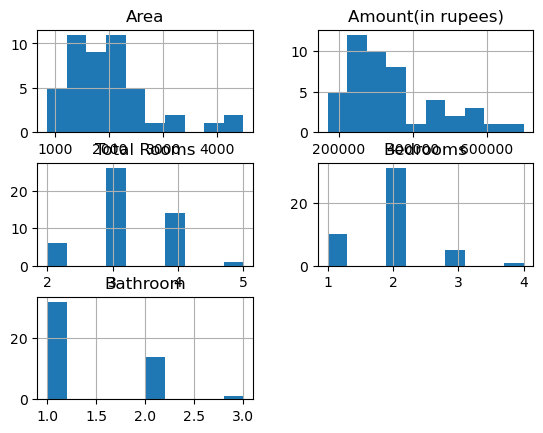

In [7]:
data.hist()

In [8]:
data.describe()

,Area,Amount(in rupees),Total Rooms,Bedrooms,Bathroom
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,340412.659574,3.212766,1.936170,1.340426
std,794.702354,125039.899586,0.689555,0.639438,0.522394
min,852.000000,169900.000000,2.000000,1.000000,1.000000
25%,1432.000000,249900.000000,3.000000,2.000000,1.000000
50%,1888.000000,299900.000000,3.000000,2.000000,1.000000
75%,2269.000000,384450.000000,4.000000,2.000000,2.000000
max,4478.000000,699900.000000,5.000000,4.000000,3.000000


In [9]:
data.head(10)

,Area,Amount(in rupees),Total Rooms,Bedrooms,Bathroom
0,2104,399900,3,1,2
1,1600,329900,3,2,2
2,2400,369000,3,2,2
3,1416,232000,2,1,1
4,3000,539900,4,2,2
5,1985,299900,4,1,3
6,1534,314900,3,1,2
7,1427,198999,3,1,2
8,1380,212000,3,1,2
9,1494,242500,3,2,1


# 2. Implement Simple Linear Regression

In [10]:
x=data.iloc[:,:1]
x.head(5)

,Area
0,2104
1,1600
2,2400
3,1416
4,3000


In [11]:
y=data.iloc[:,1:2]
y.head(5)

,Amount(in rupees)
0,399900
1,329900
2,369000
3,232000
4,539900


In [12]:
data.corr()

,Area,Amount(in rupees),Total Rooms,Bedrooms,Bathroom
Area,1.000000,0.854988,0.571860,0.449404,0.144532
Amount(in rupees),0.854988,1.000000,0.447473,0.439033,0.005856
Total Rooms,0.571860,0.447473,1.000000,0.672412,0.398051
Bedrooms,0.449404,0.439033,0.672412,1.000000,-0.324014
Bathroom,0.144532,0.005856,0.398051,-0.324014,1.000000


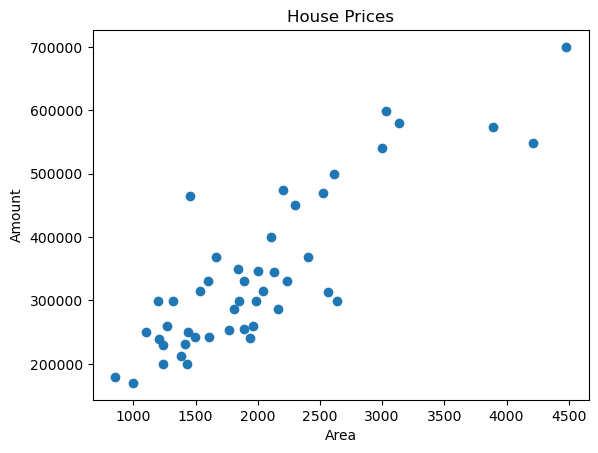

In [15]:
plt.scatter(x,y)
plt.title("House Prices")
plt.xlabel("Area")
plt.ylabel("Amount")
plt.show()

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
data.shape

(47, 5)

In [18]:
xtrain.shape

(37, 1)

In [19]:
xtest.shape

(10, 1)

In [20]:
ytrain.shape

(37, 1)

In [21]:
ytest.shape

(10, 1)

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started...\n')
print()
lin_reg.fit(xtrain,ytrain)
print()
print('Training Completed.....\n')
print()
print('Testing invoked....\n')
ypred=lin_reg.predict(xtest)
print('Predict Total Payment\n',ypred)
print('\n Testing is also Completed...\n')

Training Started...



Training Completed.....


Testing invoked....

Predict Total Payment
 [[399158.36830248]
 [350252.26296473]
 [255664.63066315]
 [221000.41314353]
 [582421.90588679]
 [226240.35300115]
 [313707.04139366]
 [467008.87158699]
 [462843.79118735]
 [207564.66991887]]

 Testing is also Completed...



In [23]:
ytest

,Amount(in rupees)
27,469000
39,287000
26,464500
43,299000
24,573900
36,229900
12,329999
19,599000
4,539900
25,249900


In [24]:
diff =ytest-ypred
diff

,Amount(in rupees)
27,69841.631698
39,-63252.262965
26,208835.369337
43,77999.586856
24,-8521.905887
36,3659.646999
12,16291.958606
19,131991.128413
4,77056.208813
25,42335.330081


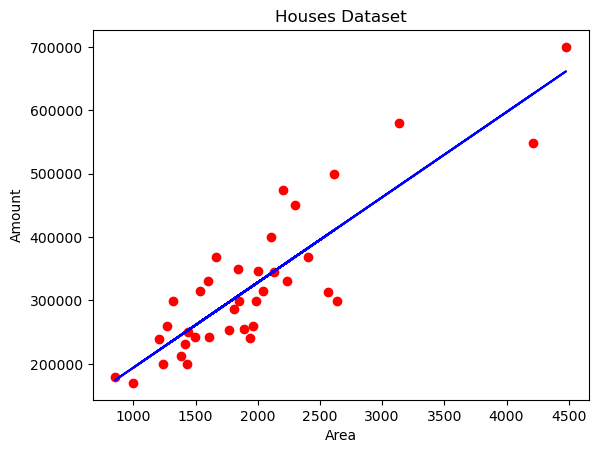

In [25]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lin_reg.predict(xtrain),color='blue')
plt.title('Houses Dataset')
plt.xlabel("Area")
plt.ylabel("Amount")
plt.show()

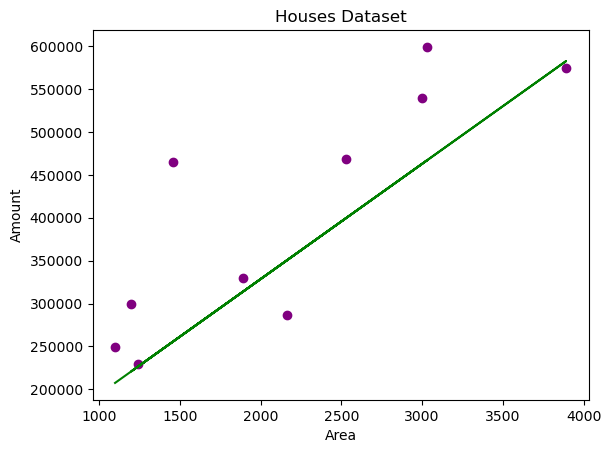

In [27]:
plt.scatter(xtest,ytest,color='purple')
plt.plot(xtest,lin_reg.predict(xtest),color='green')
plt.title('Houses Dataset')
plt.xlabel("Area")
plt.ylabel("Amount")
plt.show()

# 3. Evaluate the simple linear regression model

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest,ypred))
print()
print('RMSE: \t', np. sqrt (mean_squared_error(ytest,ypred)))
print()
print('Variance Score:\t', explained_variance_score(ytest,ypred))
print()
print('R-Square: \t', r2_score(ytest,ypred))

Mean Squared Error: 	 8407789060.4898405

RMSE: 	 91693.99686178938

Variance Score:	 0.7006183609566381

R-Square: 	 0.526301453884142


# 4. Implement Multiple Linear Regression

In [43]:
dataset=pd.read_csv('house.csv')
dataset

,Area,Total Rooms,Bedrooms,Bathroom,Amount(in rupees)
0,2104,3,1,2,399900
1,1600,3,2,2,329900
2,2400,3,2,2,369000
3,1416,2,1,1,232000
4,3000,4,2,2,539900
5,1985,4,1,3,299900
6,1534,3,1,2,314900
7,1427,3,1,2,198999
8,1380,3,1,2,212000
9,1494,3,2,1,242500


In [49]:
a=dataset.iloc[:,:4]
a.head()

,Area,Total Rooms,Bedrooms,Bathroom
0,2104,3,1,2
1,1600,3,2,2
2,2400,3,2,2
3,1416,2,1,1
4,3000,4,2,2


In [50]:
b=dataset.iloc[:,-1:]
b.head()

,Amount(in rupees)
0,399900
1,329900
2,369000
3,232000
4,539900


In [51]:
import sklearn
from sklearn.model_selection import train_test_split

atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.2,random_state=42)

In [1]:
atrain

NameError: name 'atrain' is not defined

In [53]:
btrain

,Amount(in rupees)
8,212000
3,232000
6,314900
40,368500
33,579900
13,699900
17,199900
44,179900
15,449900
9,242500


In [54]:
atest

,Area,Total Rooms,Bedrooms,Bathroom
27,2526,3,2,1
39,2162,4,2,2
26,1458,3,2,1
43,1200,3,2,1
24,3890,3,2,1
36,1239,3,2,1
12,1890,3,2,1
19,3031,4,3,1
4,3000,4,2,2
25,1100,3,2,1


In [55]:
btest

,Amount(in rupees)
27,469000
39,287000
26,464500
43,299000
24,573900
36,229900
12,329999
19,599000
4,539900
25,249900


In [57]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started...\n')
print()
lin_reg.fit(atrain,btrain)
print()
print('Training Completed.....\n')
print()
print('Testing invoked....\n')
bpred=lin_reg.predict(atest)
print('Predict Total Payment\n',bpred)
print('\n Testing is also Completed...\n')

Training Started...



Training Completed.....


Testing invoked....

Predict Total Payment
 [[409561.7045931 ]
 [333445.71725124]
 [257533.65471388]
 [220807.77749586]
 [603724.86942013]
 [226359.36358696]
 [319028.14679986]
 [472509.52066008]
 [452733.64402914]
 [206572.94136485]]

 Testing is also Completed...



In [58]:
diff =btest-bpred
diff

,Amount(in rupees)
27,59438.295407
39,-46445.717251
26,206966.345286
43,78192.222504
24,-29824.869420
36,3540.636413
12,10970.853200
19,126490.479340
4,87166.355971
25,43327.058635


# 5. Evaluate the multiple linear regression model

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(btest,bpred))
print()
print('RMSE: \t', np. sqrt (mean_squared_error(btest,bpred)))
print()
print('Variance Score:\t', explained_variance_score(btest,bpred))
print()
print('R-Square: \t', r2_score(btest,bpred))

Mean Squared Error: 	 8113667490.202171

RMSE: 	 90075.89849788994

Variance Score:	 0.7070526220396965

R-Square: 	 0.5428723929531658
